In [1]:
# This program is based on the Udemy course "Python for Finance: Investment Fundamentals & Data Analytics" 
# by Martin and Ned from 365
# Link to the course: https://www.udemy.com/course/python-for-finance-investment-fundamentals-data-analytics/
# This is a jupyter notebook file, better to run in jupyter notebook enviorment.
# Author: Martin and Ned, 365 Team. 
# Updated by: Kuo L. 2022-01-28

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# It uses yahoo finance api to get close price for each ticker stock/ETF.
# use any 3 tickers, I just use vanguard ETFs.
# you can put more than 3 tickers, just note that the more tickers in, 
# the more calculation needed to plot efficient frontier. change num_simulation to a higher number as needed.

num_simulation = 2000
assets = ['VYM', 'VTI', 'VOO','VGIT']
pf_data = pd.DataFrame()

for a in assets:
    #you can chagne the start date to any date in 'yyyy-mm-dd' format.
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2018-1-1', end = '2021-1-1')['Adj Close'] 

In [3]:
pf_data.head() #makre sure companies were public at starting date

,VYM,VTI,VOO,VGIT
Date,,,,
2018-01-02,75.506035,129.037643,230.026489,58.771881
2018-01-03,75.752106,129.784454,231.394943,58.790325
2018-01-04,76.086044,130.279297,232.409698,58.744259
2018-01-05,76.428780,131.044769,233.899200,58.707420
2018-01-08,76.569374,131.343567,234.383286,58.670578


In [4]:
pf_data.tail() #check companies still open and public at ending date

,VYM,VTI,VOO,VGIT
Date,,,,
2020-12-24,87.738785,190.307831,334.498718,68.192955
2020-12-28,87.962074,191.511902,337.408173,68.222473
2020-12-29,87.826157,190.712463,336.698090,68.222473
2020-12-30,88.088264,191.225708,337.151794,68.242142
2020-12-31,88.835770,192.104111,338.966492,68.271652


<AxesSubplot:xlabel='Date'>

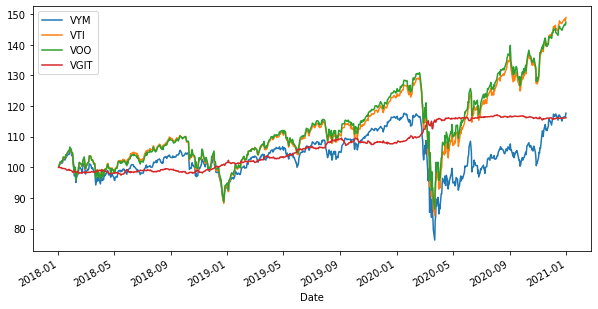

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [7]:
log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

VYM     0.053833
VTI     0.131766
VOO     0.128380
VGIT    0.049613
dtype: float64

In [8]:
log_returns.cov() * 250 #get coveriance between each pair.

,VYM,VTI,VOO,VGIT
VYM,0.050683,0.049988,0.050329,-0.003952
VTI,0.049988,0.054165,0.054211,-0.003869
VOO,0.050329,0.054211,0.054593,-0.003977
VGIT,-0.003952,-0.003869,-0.003977,0.001251


In [9]:
log_returns.corr() #get correlation between each pair.

,VYM,VTI,VOO,VGIT
VYM,1.000000,0.954073,0.956795,-0.496366
VTI,0.954073,1.000000,0.996920,-0.470090
VOO,0.956795,0.996920,1.000000,-0.481269
VGIT,-0.496366,-0.470090,-0.481269,1.000000


### Expected Portfolio Return:

np.sum(weights * log_returns.mean()) * 250

### Expected Portfolio Variance:

np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

### Expected Portfolio Volatility:

np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

***

In [10]:
num_assets = len(assets)
pfolio_returns = []
pfolio_volatilities = []

w_lst = []

for i in range(num_assets):
    w_lst.append([])

# Followig generate the simulation
for x in range (num_simulation):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    for i in range(num_assets):
        w_lst[i].append(weights[i])

    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

for i in range(num_assets):
    w_lst[i] = np.array(w_lst[i])

# pfolio_returns, pfolio_volatilities, w_lst[0], w_lst[1], w_lst[2]

In [11]:
# build simulated portfolios.
df_build = {'Return': pfolio_returns, 'Volatility': pfolio_volatilities}
for w in range(num_assets):
    df_build[assets[w]] = w_lst[w]
portfolios = pd.DataFrame(df_build)

In [12]:
portfolios.head() #checking to see if any error

,Return,Volatility,VYM,VTI,VOO,VGIT
0,0.076488,0.122139,0.439501,0.018601,0.167852,0.374046
1,0.092852,0.132607,0.110603,0.334976,0.211104,0.343317
2,0.084274,0.125572,0.242556,0.342410,0.048957,0.366078
3,0.117634,0.194409,0.237625,0.572417,0.131363,0.058595
4,0.091828,0.124062,0.041761,0.204125,0.366710,0.387405


In [13]:
portfolios.tail() #checking to see if any error

,Return,Volatility,VYM,VTI,VOO,VGIT
1995,0.090434,0.122372,0.069265,0.136907,0.401361,0.392466
1996,0.106400,0.165667,0.190467,0.359373,0.260836,0.189324
1997,0.114554,0.182236,0.220416,0.205351,0.460922,0.113311
1998,0.092159,0.151599,0.389165,0.262785,0.106681,0.241369
1999,0.095838,0.131232,0.002960,0.351474,0.286402,0.359165


In [14]:
portfolios.sort_values(by=['Volatility']) # Sort by volatility. Theoretically the portfolio with lowest valatility is the best one.

,Return,Volatility,VYM,VTI,VOO,VGIT
67,0.044255,0.040656,0.134494,0.030483,0.052204,0.782819
695,0.042446,0.042105,0.203774,0.019077,0.005499,0.771650
1257,0.051144,0.047689,0.051531,0.122471,0.076168,0.749831
519,0.052537,0.051144,0.095916,0.005064,0.172915,0.726105
298,0.054016,0.052257,0.023899,0.230444,0.016245,0.729412
...,...,...,...,...,...,...
385,0.129914,0.208321,0.149991,0.250015,0.597424,0.002569
933,0.130161,0.208637,0.086852,0.593072,0.313349,0.006727
147,0.132088,0.208787,0.068471,0.409486,0.514857,0.007187
782,0.129396,0.209210,0.135260,0.485624,0.379104,0.000012


Text(0, 0.5, 'Expected Return')

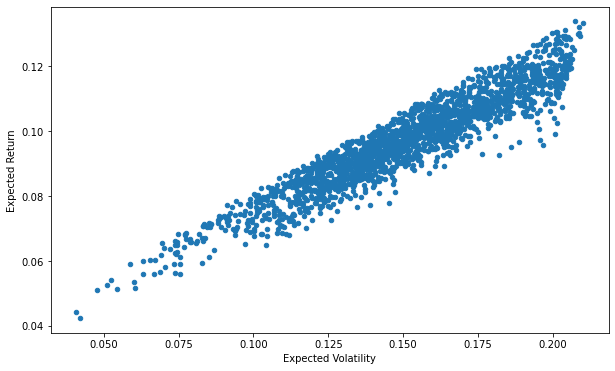

In [15]:
# check the plot
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [16]:
#generate path and name then export
path = 'results/'
name = '_'.join(assets) + '.csv'
path_name = path + name 
portfolios.sort_values(by=['Volatility']).to_csv(path_name)

In [24]:
# calculation
print("money amount calculation for demo use only, please don't simply invest on this results alone.")

sorted_portfolios = portfolios.sort_values(by=['Volatility']).head(1)

total_investment = 25000
print("Intend to invest ${:.2f}".format(total_investment) + " total.")

for i in range(len(assets)):
    inv = total_investment * sorted_portfolios[assets[i]].iloc[0]
    print("invest in " + assets[i] + " for ${:.2f}".format(inv) + ".")

print("Expected annual portfolio return is {:.1f}".format(sorted_portfolios['Return'].iloc[0]*100) + "%")
print("Expected annual portfolio volatility is {:.1f}".format(sorted_portfolios['Volatility'].iloc[0]*100) + "%")

Intend to invest $25000.00 total.
invest in VYM for $3362.36.
invest in VTI for $762.07.
invest in VOO for $1305.10.
invest in VGIT for $19570.48.
Expected annual portfolio return is 4.4%
Expected annual portfolio volatility is 4.1%
